In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from deepwave.scalar import Propagator
from deepwave.wavelets import ricker

In [9]:
model = torch.ones(30)*1500
model_true = model.clone()
model_true[15:] += 1000
model.requires_grad = True
dx = 5.0
nt = 100
dt = 0.0021
source_amplitudes = ricker(25, nt, dt, 0.05).reshape(-1, 1, 1)
source_locations = torch.Tensor([[[dx]]])
receiver_locations = torch.Tensor([[[5*dx]]])

# Create "real" data
p = Propagator({'vp': model_true}, dx)
y_true = p(source_amplitudes, source_locations, receiver_locations, dt)

# Create "modeled" data
p = Propagator({'vp': model}, dx)
y = p(source_amplitudes, source_locations, receiver_locations, dt)

# Calculate loss between "real" and "modeled" data and backpropagate
l = torch.nn.MSELoss()(y, y_true)
l.backward()

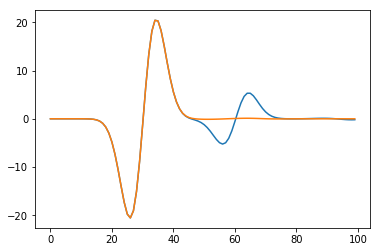

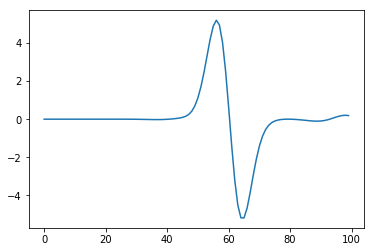

In [11]:
# Plot "real" and "modeled" data and difference
plt.plot(y_true.detach().numpy().ravel())
plt.plot(y.detach().numpy().ravel())
plt.figure()
plt.plot((y-y_true).detach().numpy().ravel())

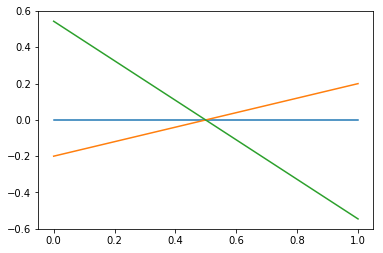

In [12]:
# Plot model gradient - zero crossing should ideally be in same place as model crossing
model_norm = ((model_true - model_true.mean())/model_true.max()).detach().numpy().ravel()
grad_norm = ((model.grad - model.grad.mean())/model.grad.max()).detach().numpy().ravel()
z1 = 14
z2 = 16
plt.plot(np.zeros(2))
plt.plot(model_norm[z1:z2])
plt.plot(grad_norm[z1:z2])